In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use("figures.mplstyle")

from flux import *
from osc import *
from rates import *
from cross_sections import *

In [2]:
Emuon = 100
Nmuon = 1e22
Pmuon = 0
enurange = np.linspace(0, Emuon, 100)
anglelab_range = np.linspace(0, 1e-2, 100) # radians
costhlab_range = np.cos(anglelab_range)
baseline = 4000e3



## Fluxes

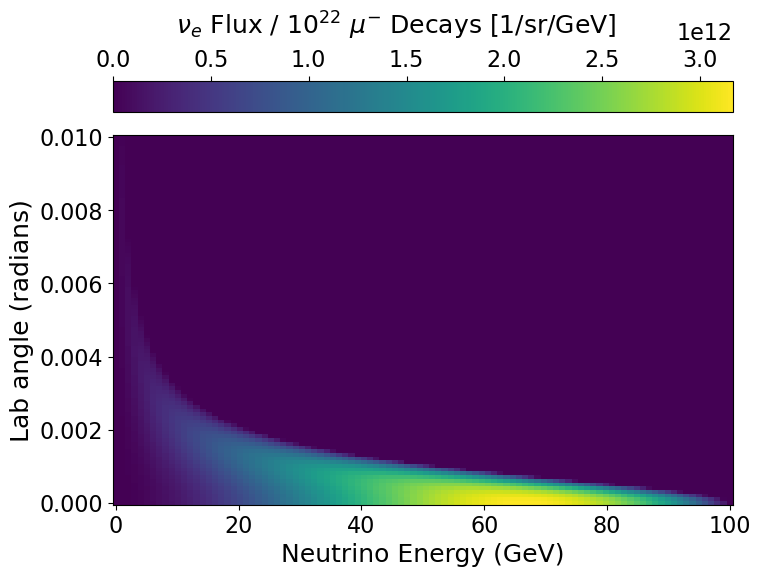

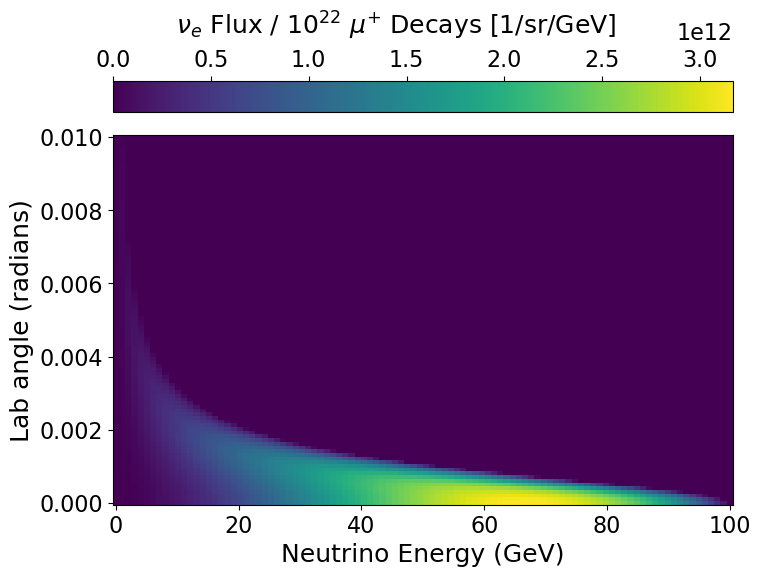

In [45]:
for mucharge in [-1,+1]:
    # 2D plot of flux
    E, costh = np.meshgrid(enurange, costhlab_range)
    fnue = nue_flux(Emuon, Nmuon, Pmuon, E, costh, baseline, mucharge=mucharge) # per GeV per costh
    plt.figure(figsize=(8,6))
    plt.pcolormesh(E, np.arccos(costh), fnue, shading='auto', cmap='viridis')
    cbar = plt.colorbar(location='top', orientation="horizontal")
    cbar.set_label("        $\\nu_e$ Flux / $10^{%d}$ $\\mu^{%s}$ Decays [1/sr/GeV]"%(np.log10(Nmuon),"+" if mucharge==1 else "-"), loc="left", labelpad=10)
    plt.xlabel('Neutrino Energy (GeV)')
    plt.ylabel('Lab angle (radians)')
    plt.show()

## Oscillations

In [11]:
osc_probs = {}
osc_probs_nubar = {}
for deltaCP in [0, np.pi/2, np.pi, 3*np.pi/2]:
    osc_probs[deltaCP] = np.abs(oscillate(enurange,baseline,0,1,deltaCP=deltaCP,dm41=10000))**2
    osc_probs_nubar[deltaCP] = np.abs(oscillate(enurange,baseline,0,-1,deltaCP=deltaCP,dm41=10000))**2

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
/var/folders/sh/mdzkh6vs0bl6zwrc7bjzk4h40000gn/T/ipykernel_6995/782826423.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(f'$P(\overline{{\\nu}}_e \\to \overline{{\\nu}}_{{{flavor}}})$')
/var/folders/sh/mdzkh6vs0bl6zwrc7bjzk4h40000gn/T/ipykernel_6995/782826423.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(f'$P(\overline{{\\nu}}_e \\to \overline{{\\nu}}_{{{flavor}}})$')


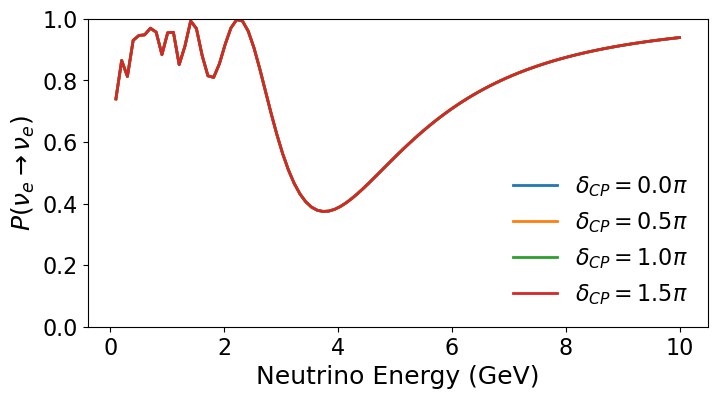

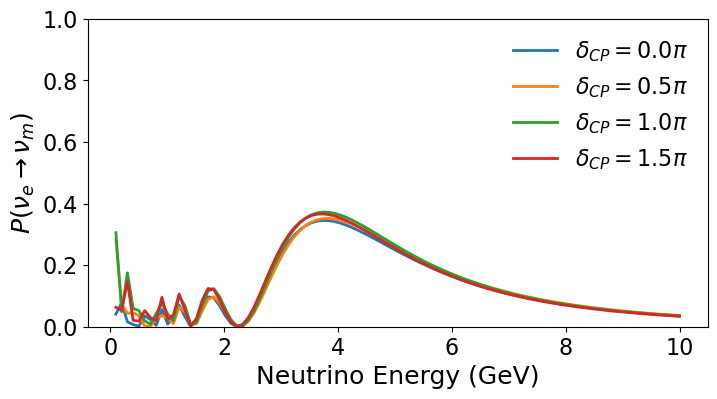

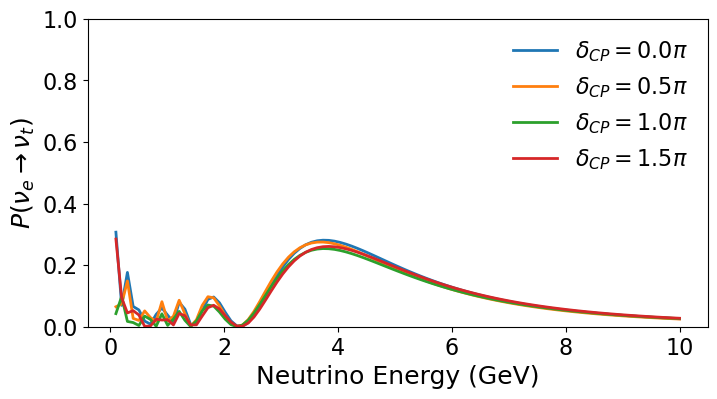

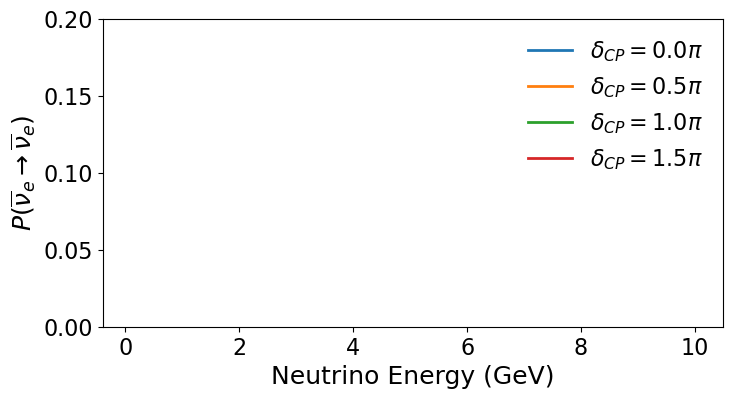

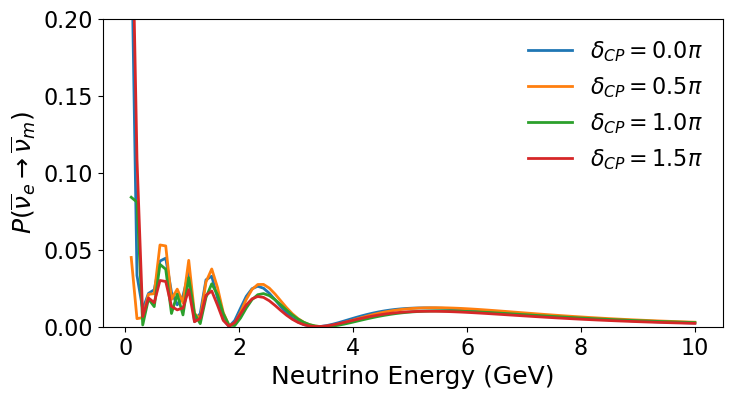

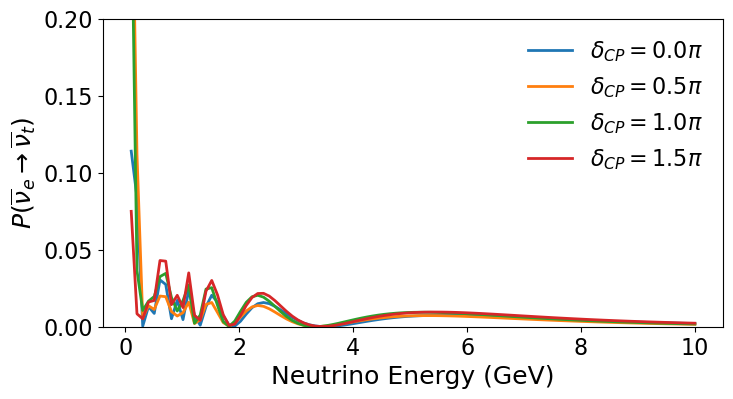

In [14]:

for i, flavor in enumerate(['e','m','t']):
    for deltaCP in [0, np.pi/2, np.pi, 3*np.pi/2]:
        plt.plot(enurange, osc_probs[deltaCP][i,:], label=f'$\\delta_{{CP}}={deltaCP/np.pi:.1f}\\pi$')
    plt.ylim(0,1)
    # plt.semilogy()
    plt.ylabel(f'$P(\\nu_e \\to \\nu_{{{flavor}}})$')
    plt.xlabel('Neutrino Energy (GeV)')
    plt.legend()
    plt.show()


for i, flavor in enumerate(['e','m','t']):
    for deltaCP in [0, np.pi/2, np.pi, 3*np.pi/2]:
        plt.plot(enurange, osc_probs_nubar[deltaCP][i,:], label=f'$\\delta_{{CP}}={deltaCP/np.pi:.1f}\\pi$')
    plt.ylim(0,0.2)
    # plt.semilogy()
    plt.ylabel(f'$P(\overline{{\\nu}}_e \\to \overline{{\\nu}}_{{{flavor}}})$')
    plt.xlabel('Neutrino Energy (GeV)')
    plt.legend()
    plt.show()

## Rates

In [53]:
baseline = 100e3 # m
off_axis_angle = 0 # rad
detector_radius = 100 # m
Emuon = 10 # GeV
Pmuon = 0


muminus_experiment = TauAppearanceRates(
    baseline=baseline,
    off_axis_angle=off_axis_angle,
    detector_radius=detector_radius,
    Emuon=Emuon,
    Pmuon=Pmuon,
    mucharge=-1)
muplus_experiment = TauAppearanceRates(
    baseline=baseline,
    off_axis_angle=off_axis_angle,
    detector_radius=detector_radius,
    Emuon=Emuon,
    Pmuon=Pmuon,
    mucharge=1)
muminus_nus_thru = muminus_experiment.nus_thru_detctor()
muplus_nus_thru = muplus_experiment.nus_thru_detctor()

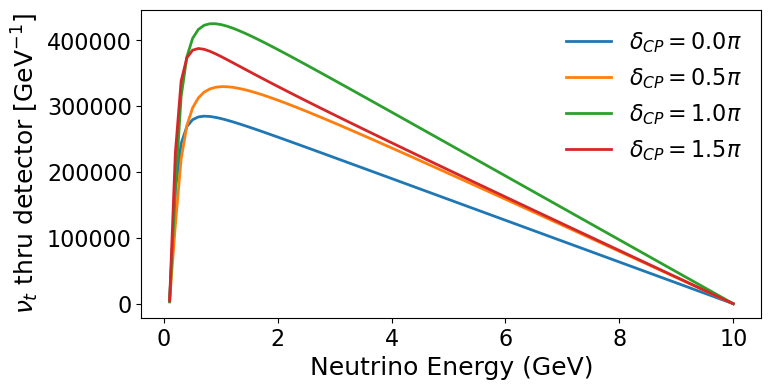

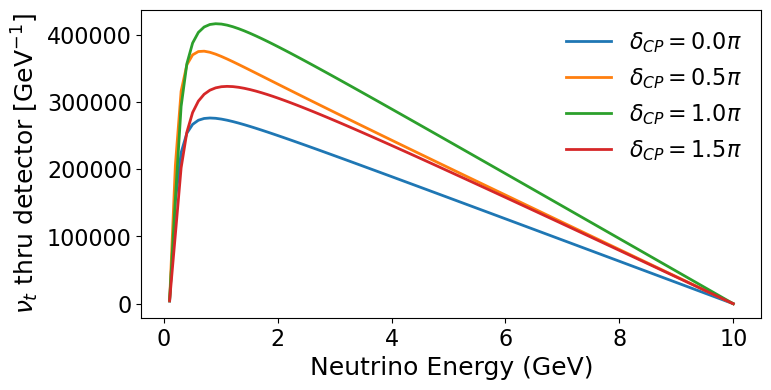

In [54]:
for i, flavor in enumerate(['e','m','t']):
    if flavor!="t": continue

    # muminus experiment
    fig,ax = plt.subplots()
    for deltaCP in muminus_nus_thru.keys():
        plt.plot(muminus_experiment.enurange, muminus_nus_thru[deltaCP][i,:], label=f'$\\delta_{{CP}}={deltaCP/np.pi:.1f}\\pi$')
    # plt.semilogy()
    plt.ylabel(r"$\nu_{%s}$ thru detector [GeV$^{-1}$]"%flavor)
    plt.xlabel('Neutrino Energy (GeV)')
    plt.legend()
    plt.show()
    plt.close(fig)

    # muplus experiment
    fig,ax = plt.subplots()
    for deltaCP in muplus_nus_thru.keys():
        plt.plot(muplus_experiment.enurange, muplus_nus_thru[deltaCP][i,:], label=f'$\\delta_{{CP}}={deltaCP/np.pi:.1f}\\pi$')
    # plt.semilogy()
    plt.ylabel(r"$\nu_{%s}$ thru detector [GeV$^{-1}$]"%flavor)
    plt.xlabel('Neutrino Energy (GeV)')
    plt.legend()
    plt.show()
    plt.close(fig)

In [42]:
muplus_experiment.flux

array([0.00000000e+00, 3.44516085e+10, 1.36081653e+11, 3.02302961e+11,
       5.30528361e+11, 8.18170681e+11, 1.16264275e+12, 1.56135739e+12,
       2.01172744e+12, 2.51116572e+12, 3.05708506e+12, 3.64689829e+12,
       4.27801824e+12, 4.94785773e+12, 5.65382959e+12, 6.39334665e+12,
       7.16382174e+12, 7.96266769e+12, 8.78729732e+12, 9.63512346e+12,
       1.05035589e+13, 1.13900166e+13, 1.22919093e+13, 1.32066497e+13,
       1.41316509e+13, 1.50643255e+13, 1.60020864e+13, 1.69423464e+13,
       1.78825185e+13, 1.88200153e+13, 1.97522497e+13, 2.06766346e+13,
       2.15905827e+13, 2.24915070e+13, 2.33768202e+13, 2.42439352e+13,
       2.50902647e+13, 2.59132217e+13, 2.67102189e+13, 2.74786692e+13,
       2.82159854e+13, 2.89195803e+13, 2.95868668e+13, 3.02152576e+13,
       3.08021657e+13, 3.13450038e+13, 3.18411848e+13, 3.22881215e+13,
       3.26832267e+13, 3.30239133e+13, 3.33075940e+13, 3.35316818e+13,
       3.36935894e+13, 3.37907297e+13, 3.38205154e+13, 3.37803595e+13,
      

## Cross section tests

In [3]:
xs = totalXS('resources/nutau_xs.txt', 'resources/nutaubar_xs.txt')

In [10]:
energy_range = np.linspace(5.6,90,100)

nu = xs.sigma_nu(energy_range)
nubar = xs.sigma_nubar(energy_range)

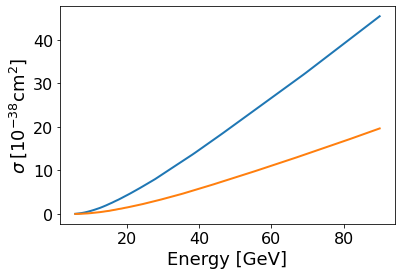

In [20]:
plt.plot(energy_range, nu)
plt.plot(energy_range, nubar)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'$\sigma \: [10^{-38}\mathrm{cm}^{2}]$')
plt.xscale('linear')
plt.yscale('linear')